# Imports

In [1]:
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

In [87]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from keras.callbacks import TensorBoard
from time import strftime

from IPython.display import display
from tensorflow.keras.utils import array_to_img

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

# Constants

In [78]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['PLANE', 'CAR', 'BIRD', 'CAT', 'DEER', 'DOG', 'FROG', 'HORSE', 'SHIP', 'TRUCK']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT*IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
NO_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)


module

In [6]:
type(x_train_all)

numpy.ndarray

# Explore the data

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

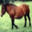

In [8]:
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
y_train_all.shape


(50000, 1)

In [10]:
y_train_all[7]

array([7], dtype=uint8)

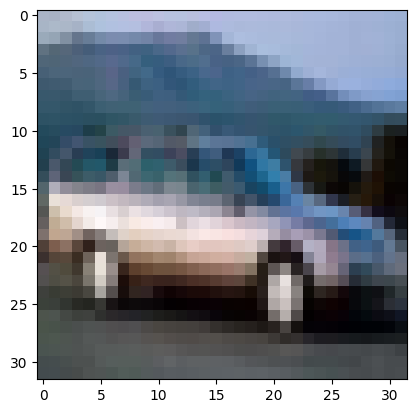

In [11]:
plt.imshow(x_train_all[4])
plt.show()

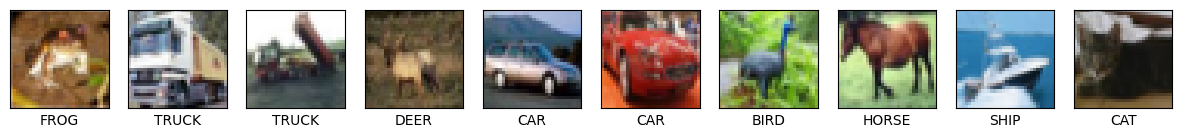

In [12]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.imshow(x_train_all[i])

In [13]:
no_images, x,y, c = x_train_all.shape
print(f'images = {no_images} \t | width = {x} \t| height = {y} \t | channels={c}')

images = 50000 	 | width = 32 	| height = 32 	 | channels=3


# PreProcess data

In [14]:
x_train_all[0][0][0][0]


59

In [15]:
x_train_all, x_test = x_train_all / 255.0 , x_test/255.0

In [16]:
type(x_train_all[0][0][0][0])


numpy.float64

In [17]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [18]:
x_train_all.shape

(50000, 3072)

In [19]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print('Shape of x_test', x_test.shape)

Shape of x_test (10000, 3072)


# Creating a validation dataset

In [20]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [21]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Creating a small dataset (for illustration)

In [22]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]


# Define our Neural Network Using keras

In [33]:
model_1 = Sequential ([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation='relu'),
    Dense(units = 64, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [34]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
    

In [35]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
    

In [24]:
type(model_1)

keras.engine.sequential.Sequential

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


 # TensorBoard (Visualising Learning)

In [26]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H%M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)
    
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Sucessfully created directory')
    return TensorBoard(log_dir=dir_paths)

# Fit the mdoel

In [27]:
samples_per_batch = 1000

In [28]:
#%%time
#no_epochs = 150
#model_1.fit(x_train_xs, y_train_xs, batch_size = samples_per_batch, epochs = no_epochs 
            #,callbacks=[get_tensorboard('Model_1')], verbose=0,
           #validation_data=(x_val, y_val))

Sucessfully created directory
CPU times: total: 2min 26s
Wall time: 53.3 s


# Model 1 Training with large dataset


In [38]:
%%time
no_epochs = 100
model_1.fit(x_train, y_train, batch_size = samples_per_batch, epochs = no_epochs 
            ,callbacks=[get_tensorboard('Model_1 XL')], verbose=0,
           validation_data=(x_val, y_val))

Sucessfully created directory
CPU times: total: 8min 57s
Wall time: 3min 51s


# Model2 Training with large dataset

In [39]:
%%time
no_epochs = 100
model_2.fit(x_train, y_train, batch_size = samples_per_batch, epochs = no_epochs 
            ,callbacks=[get_tensorboard('Model_2 XL')], verbose=0,
           validation_data=(x_val, y_val))

Sucessfully created directory
CPU times: total: 18min 39s
Wall time: 6min 2s


# Model 3 Training with large dataset

In [40]:
%%time
no_epochs = 100
model_3.fit(x_train, y_train, batch_size = samples_per_batch, epochs = no_epochs 
            ,callbacks=[get_tensorboard('Model_3 XL')], verbose=0,
           validation_data=(x_val, y_val))

Sucessfully created directory
CPU times: total: 19min 14s
Wall time: 6min 28s


# Prediction on individual Images


In [41]:
x_val[0].shape

(3072,)

In [43]:
test = np.expand_dims(x_val[0], axis = 0)
test.shape

(1, 3072)

In [45]:
np.set_printoptions(precision=3)

In [47]:
model_2.predict(test)

1/1 [==============================] - 0s 26ms/step


array([[1.741e-02, 1.288e-03, 4.490e-02, 5.690e-02, 9.026e-02, 5.103e-02,
        7.335e-01, 4.303e-03, 2.706e-04, 8.845e-05]], dtype=float32)

In [49]:
model_2.predict(x_val).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [68]:
prediction = np.argmax(model_2.predict(test),axis=1)
print(prediction)
prediction.shape

1/1 [==============================] - 0s 61ms/step
[6]


(1,)

In [54]:
y_val[0] #The prediction was right

array([6], dtype=uint8)

In [59]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis = 0)
    predicted_val = np.argmax(model_2.predict(test_img), axis = 1)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

# Has an accuracy of approximately 50%.

1/1 [==============================] - 0s 116ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 51ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 51ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 52ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 45ms/step
Actual value: 1 vs. predicted: 0
1/1 [==============================] - 0s 46ms/step
Actual value: 1 vs. predicted: 6
1/1 [==============================] - 0s 49ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 45ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 50ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 51ms/step
Actual value: 3 vs. predicted: 1


# Evaluation

In [60]:
model_2.metrics_names

['loss', 'accuracy']

In [63]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f' Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 4ms/step - loss: 1.4215 - accuracy: 0.4976
 Test loss is 1.42 and test accuracy is 49.8%


### Confusion Matrix

In [69]:
predictions = np.argmax(model_2.predict(x_test), axis =1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

313/313 [==============================] - 1s 3ms/step


In [70]:
conf_matrix.shape


(10, 10)

In [73]:
no_rows = conf_matrix.shape[0]
no_cols = conf_matrix.shape[1]

In [74]:
conf_matrix.max()

696

In [75]:
conf_matrix.min()

4

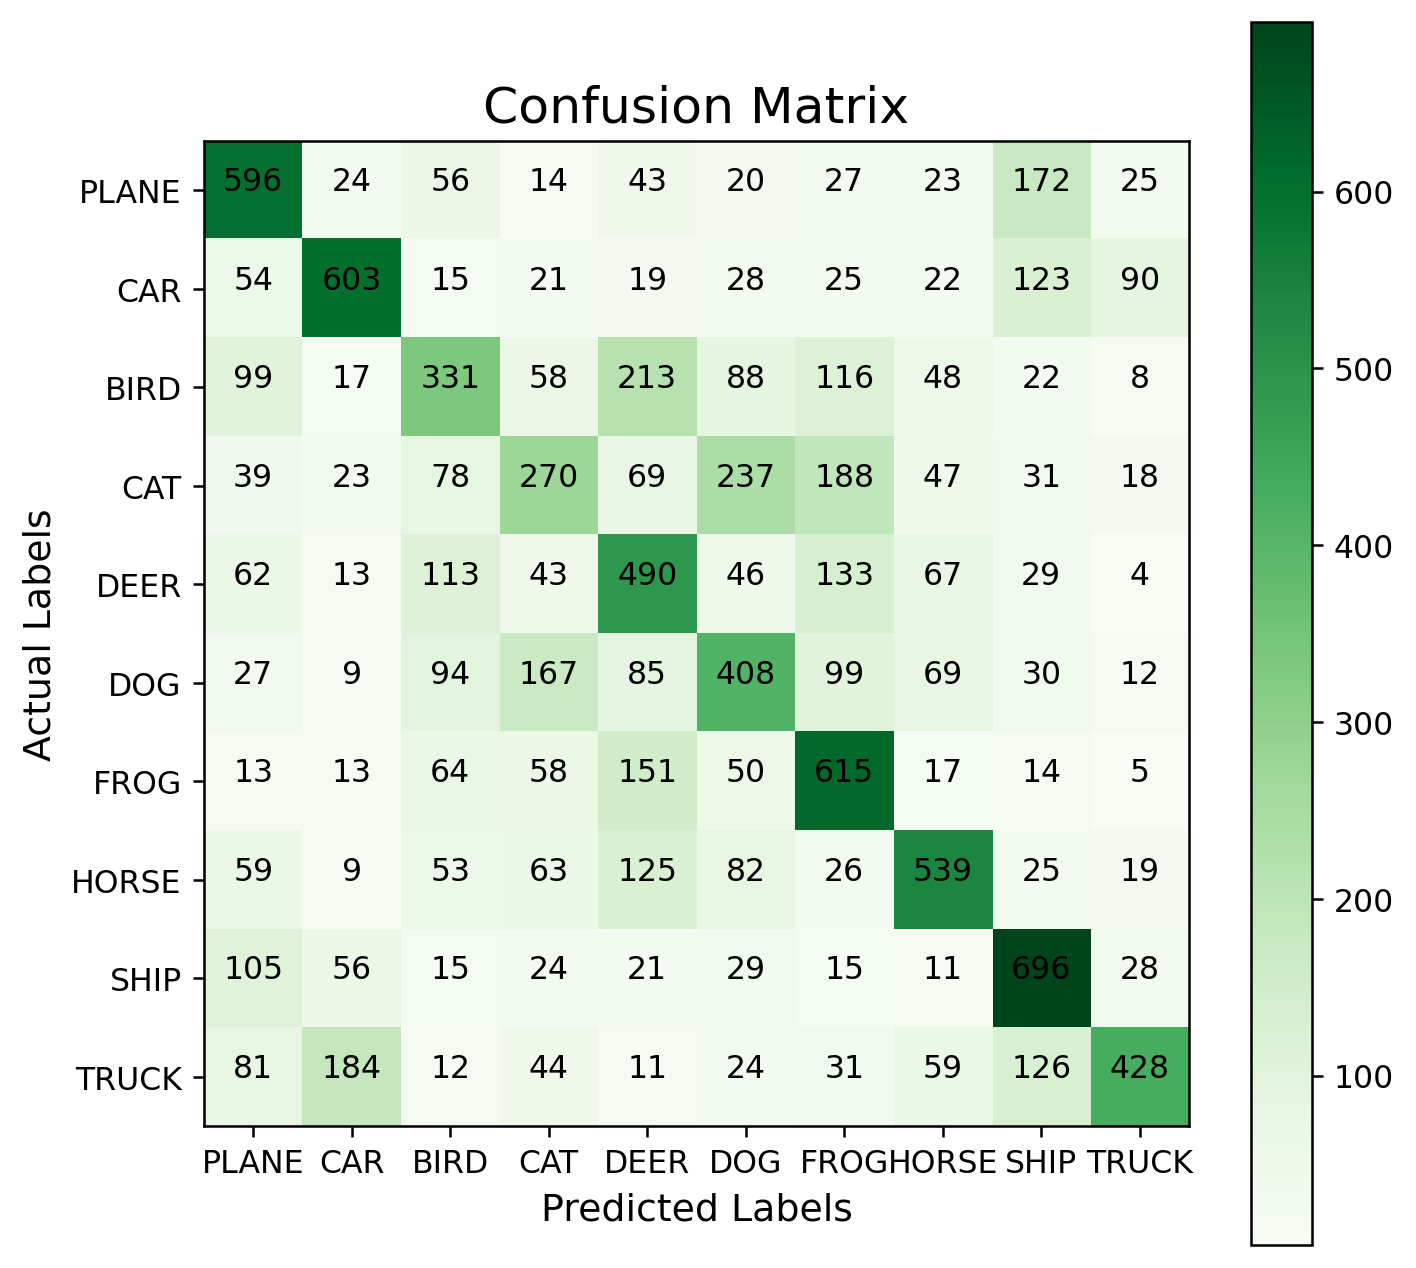

In [90]:
plt.figure(figsize=(7,7), dpi = 227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NO_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(no_rows), range(no_cols)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center')
    

plt.show()

# true Positives ( are the values which we get when our model predicted the correct image label)

In [91]:
np.diag(conf_matrix)

array([596, 603, 331, 270, 490, 408, 615, 539, 696, 428], dtype=int64)

In [94]:
# Recall Score
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis = 1)
recall

array([0.596, 0.603, 0.331, 0.27 , 0.49 , 0.408, 0.615, 0.539, 0.696,
       0.428])

In [95]:
# Precision 
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis =0)
precision

array([0.525, 0.634, 0.398, 0.354, 0.399, 0.403, 0.482, 0.598, 0.549,
       0.672])

In [98]:
avg_recall = np.mean(recall)
print(f'The average recall for the model is: {avg_recall:.2%}')

The average recall for the model is: 49.76%


In [99]:
avg_precision = np.mean(precision)
print(f' The average precision of the model is: {avg_precision:.2%}')

 The average precision of the model is: 50.15%


In [101]:
# F1 Score
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f' The F1 Score of the Image classification model is: {f1_score:.2%}')

 The F1 Score of the Image classification model is: 49.95%
